In [200]:
pip install pandas numpy seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [201]:
import numpy as np

In [202]:
import pandas as pd

In [203]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [204]:
import seaborn as sns

In [205]:
import matplotlib.pyplot as plt

In [206]:
df1=pd.read_csv("Salary Data.csv")

In [207]:
df=df1.copy()

In [208]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [209]:
#target variable is salary

In [210]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [211]:
for i in df.columns:
  print(i," ",df[i].dtype)

Age   float64
Gender   object
Education Level   object
Job Title   object
Years of Experience   float64
Salary   float64


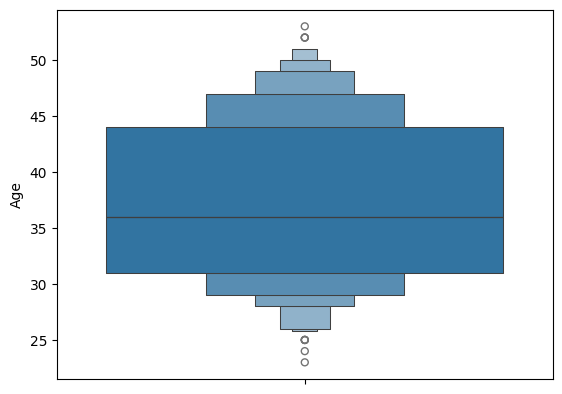

In [212]:
sns.boxenplot(df["Age"])
plt.show()


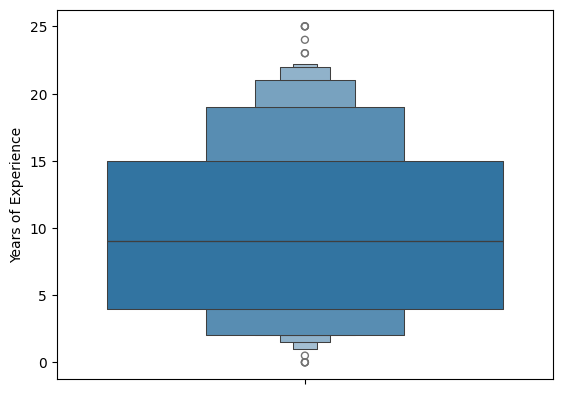

In [213]:
sns.boxenplot(df["Years of Experience"])
plt.show()

In [214]:
#finding null values
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [215]:
age_meadin=df["Age"].median()
Experience_median=df["Years of Experience"].median()
age_meadin
Experience_median


np.float64(9.0)

In [216]:
Experience_median

np.float64(9.0)

In [217]:
# the next step is replacing the median value in which have null values
df["Age"].fillna(age_meadin,inplace=True)

C:\Users\rajas\AppData\Local\Temp\ipykernel_16300\2909454906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(age_meadin,inplace=True)


In [218]:
Experience_median = df["Years of Experience"].median()
df["Years of Experience"].fillna(Experience_median,inplace=True)

C:\Users\rajas\AppData\Local\Temp\ipykernel_16300\2386850357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Years of Experience"].fillna(Experience_median,inplace=True)


In [219]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        2
Job Title              2
Years of Experience    0
Salary                 2
dtype: int64

In [220]:
# now we have to find mode for categorical dat
Gender_mode=df["Gender"].mode()[0]
Education_mode=df["Education Level"].mode()[0]
Job_Title_mode=df["Job Title"].mode()[0]



In [221]:
Gender_mode

'Male'

In [222]:
Education_mode

"Bachelor's"

In [223]:
Job_Title_mode

'Director of Marketing'

In [224]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].describe())
    print("****"*10)


count      373
unique       2
top       Male
freq       194
Name: Gender, dtype: object
****************************************
count            373
unique             3
top       Bachelor's
freq             224
Name: Education Level, dtype: object
****************************************
count                       373
unique                      174
top       Director of Marketing
freq                         12
Name: Job Title, dtype: object
****************************************


In [225]:
df["Gender"].fillna(Gender_mode,inplace=True)
df["Education Level"].fillna(Education_mode,inplace=True)
df["Job Title"].fillna(Job_Title_mode,inplace=True)

C:\Users\rajas\AppData\Local\Temp\ipykernel_16300\217222152.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(Gender_mode,inplace=True)
C:\Users\rajas\AppData\Local\Temp\ipykernel_16300\217222152.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [226]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 2
dtype: int64

In [239]:
def finding_out(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr 
  return lw,uw


In [245]:
list_1=["Age","Years of Experience"]
for i in list_1:
  lw,uw=finding_out(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])


In [241]:
lw

np.float64(-12.5)

In [242]:
uw

np.float64(31.5)

<Axes: ylabel='Age'>

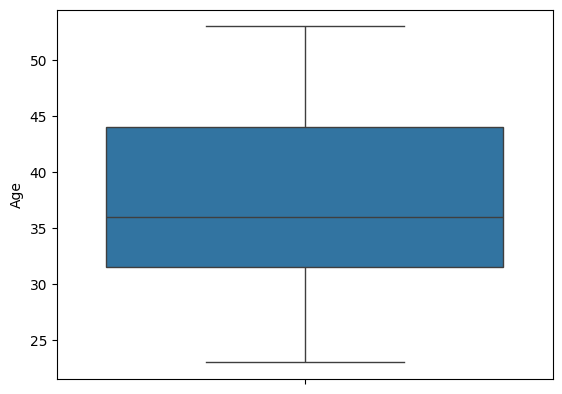

In [244]:
sns.boxplot(df["Age"])

<Axes: ylabel='Years of Experience'>

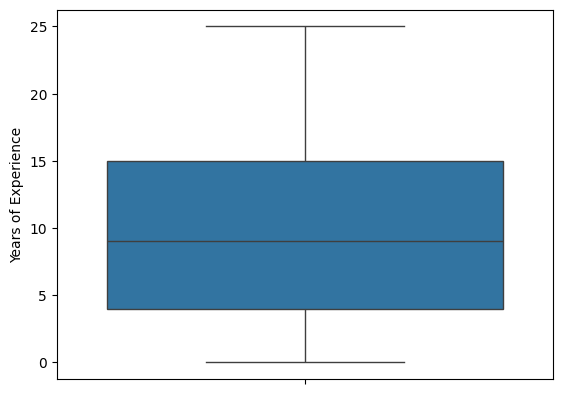

In [247]:
sns.boxplot(df["Years of Experience"])

In [248]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [249]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 2
dtype: int64

In [250]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].describe())
    print("****"*10)

count      375
unique       2
top       Male
freq       196
Name: Gender, dtype: object
****************************************
count            375
unique             3
top       Bachelor's
freq             226
Name: Education Level, dtype: object
****************************************
count                       375
unique                      174
top       Director of Marketing
freq                         14
Name: Job Title, dtype: object
****************************************


<Axes: ylabel='Salary'>

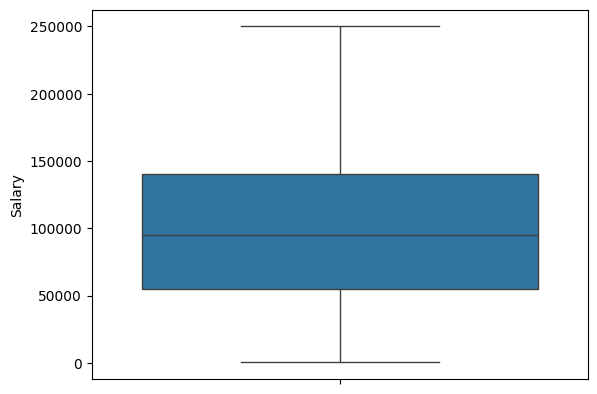

In [251]:
 sns.boxplot(df['Salary'])

In [253]:
salary_mean=df["Salary"].mean()
salary_mean

np.float64(100577.34584450402)

In [254]:
df["Salary"].fillna(salary_mean,inplace=True)

C:\Users\rajas\AppData\Local\Temp\ipykernel_16300\4294830775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Salary"].fillna(salary_mean,inplace=True)


In [256]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [ ]:
# now we are converting categorical data to numerical data
# there are two types of methode
# 1) get_dummies
# 2) map function
# but we are using get dumies methode

In [258]:
dummies

,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,Job Title_CEO,Job Title_Chief Data Officer,Job Title_Chief Technology Officer,Job Title_Content Marketing Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
373,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [259]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [261]:
unique_values = df["Job Title"].unique()
unique_values

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [270]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 325.1 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 404.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/11.0 MB 4.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/11.0 MB 9.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/11.0 MB 19.7 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.0 MB 25.6 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.0 MB 25.6 MB/s eta 0:00:01
   -----

In [271]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in df.select_dtypes(include="object").columns:
    df[col] = label_encoder.fit_transform(df[col])


In [272]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,0,0,131,8.0,85000.0
371,43.0,1,1,30,19.0,170000.0
372,29.0,0,0,70,2.0,40000.0
373,34.0,1,0,137,7.0,90000.0


In [274]:
df["Job Title"].count()

np.int64(375)

In [275]:
unique = df["Job Title"].unique()

In [276]:
unique

array([159,  17, 130, 101,  22,  81,  93, 104,  82, 150, 158,  40,  36,
        96,  13,  89,  83, 116,  18, 102,   3, 172,  44,  98,  37, 157,
       160,  57, 112,  92,   6,   1,  19,  84, 167,  39,  95,  16, 103,
       169,  88,  85,   2, 162,  10,   0,  29,  41,  12,   5,  34, 171,
        38, 170, 156,  30, 115,  47,  21,  43,  14,   4, 118, 173,  99,
       166,  11, 153,  42,   9, 165, 106,   8,  56,  35,  46, 144,  91,
       164, 134, 168, 100,  76,  97,  87,  94, 122,  80, 143,   7,  20,
        45, 131,  15, 120, 161, 163, 110,  62,  86,  90,  61, 141,  66,
       121, 105, 152,  79, 154, 146,  73,  64,  54, 142,  49, 148,  65,
        70, 109,  32,  71, 111, 139,  53, 129,  59, 138,  28,  77, 149,
        31,  52, 132, 125,  50, 108, 147,  60,  25,  63,  55, 136, 124,
       155,  69, 135, 128, 145,  33, 107,  23,  74, 126, 113,  27,  48,
        78, 133, 127, 117,  51,  75, 140,  68, 151,  72, 119, 123, 114,
        67,  26, 137,  58,  24])

In [278]:
from sklearn.linear_model import LinearRegression


In [279]:
from sklearn.model_selection import train_test_split


In [280]:
from sklearn.metrics import mean_squared_error, r2_score

In [281]:
# now we have to slpit the data 

In [282]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [284]:
y=df["Salary"]
x=df[["Gender","Education Level","Job Title","Years of Experience",'Age']]

In [285]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 375, dtype: float64

In [286]:
x

,Gender,Education Level,Job Title,Years of Experience,Age
0,1,0,159,5.0,32.0
1,0,1,17,3.0,28.0
2,1,2,130,15.0,45.0
3,0,0,101,7.0,36.0
4,1,1,22,20.0,52.0
...,...,...,...,...,...
370,0,0,131,8.0,35.0
371,1,1,30,19.0,43.0
372,0,0,70,2.0,29.0
373,1,0,137,7.0,34.0


In [298]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [299]:
x_test.count()

Gender                 75
Education Level        75
Job Title              75
Years of Experience    75
Age                    75
dtype: int64

In [300]:
x_train.count()

Gender                 300
Education Level        300
Job Title              300
Years of Experience    300
Age                    300
dtype: int64

In [301]:
model=LinearRegression()

In [302]:
model.fit(x_train, y_train)

LinearRegression()

In [303]:
y_pred=model.predict(x_test)

In [304]:
y_pred

array([ 60620.75101809, 103073.58365375, 149643.88604948, 110260.90610398,
        85086.3302631 , 162265.9823813 , 166395.41417505,  82524.94944005,
       160256.50082754, 100636.60816228, 160145.30406235,  49216.40600291,
       177726.64992549,  88743.33077455, 111640.86739898,  89157.10696673,
        42673.34918985,  51842.00814329,  40429.79446345,  80771.57315666,
       146473.26135356, 135816.28328836, 129758.34787025, 102456.44378439,
        51679.79816492, 160535.22014098, 103439.12997747,  46095.0304582 ,
       120763.57018732,  52437.02462925,  76591.64614123,  58424.91651876,
       101743.89914283, 124566.78922826, 163345.61062083, 163347.65753646,
        45819.09448948,  40657.98634718,  67634.92862691, 105350.11322883,
       124812.02405166, 166046.36894159,  38430.70592331, 148937.16315696,
        36163.04043774, 134245.96696443,  88743.33077455, 152153.7523681 ,
        49655.06159137,  93021.76444251,  55093.10112723,  61871.4771834 ,
       151665.83927831, 1

In [306]:
mse=mean_squared_error(y_test,y_pred)

In [310]:
rmse=  np.sqrt(mse)
mse

np.float64(139404583.32937658)

In [309]:
rmse

np.float64(11806.971810306679)

In [311]:
r2=r2_score(y_test,y_pred)

In [312]:
r2

0.9277237086804515

In [313]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [314]:
import joblib

In [316]:
joblib.dump(model,'salary_pred.pkl')

['salary_pred.pkl']

In [318]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [320]:
pip install streamlit

  Using cached streamlit-1.39.0-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached altair-5.4.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached protobuf-5.28.2-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached pyarrow-17.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached rich-13.9.2-py3-none-any.whl.metadata (18 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\normalizer.exe' -> 'c:\\Python312\\Scripts\\normalizer.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
